In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Flatten, Input, Layer, MaxPooling2D, Conv2D, Reshape, UpSampling2D
from keras.losses import binary_crossentropy, mse, mean_absolute_error
from keras import backend as K
from keras.optimizers import Adam
from keras.constraints import unit_norm
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import tensorflow as tf
import numpy as np
import scipy.stats as st
import pandas as pd
import seaborn as sns

from networks import *
from keras import regularizers
import sys
import argparse
import os
import glob 

import matplotlib
import matplotlib.pyplot as plt

from numpy.random import seed
seed(0)
from tensorflow import set_random_seed
set_random_seed(0)

Using TensorFlow backend.


# Data Loading

In [2]:
folder = 'sample_data'

# load sample data from two modalities
view1_1 = np.loadtxt(folder+'/view1_1.txt')
view1_2 = np.loadtxt(folder+'/view1_2.txt')
view2_1 = np.loadtxt(folder+'/view2_1.txt')
view2_2 = np.loadtxt(folder+'/view2_2.txt')

age_1 = np.loadtxt(folder+'/age_1.txt')
age_2 = np.loadtxt(folder+'/age_2.txt')
N = view1_1.shape[0]

N1 = 99
N2 = 108

encoder1 = build_encoder_T1(N1)
encoder2 = build_encoder_DTI(N2)
decoder1 = build_decoder_T1(N1)
decoder2 = build_decoder_DTI(N2)

# LSSL Pre-train

In [3]:
ae_1 = build_ae_T1(encoder1, decoder1, N1)
lssl_1 = build_LSSL(ae_1,N1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001)
model_checkpoint_callback = ModelCheckpoint(
    filepath='models/lssl_1.h5',
    monitor='val_loss',
    mode='min',
    save_weights_only=True,
    save_best_only=True)
lssl_1.compile(optimizer='adam')

dummy = np.ones((N,))
lssl_1.fit([view1_1,view1_2,dummy],validation_data=([view1_1,view1_2,dummy],None),
           batch_size=128,epochs=200,verbose=1, callbacks=[reduce_lr,model_checkpoint_callback])

lssl_1.load_weights('models/lssl_1.h5')

Train on 760 samples, validate on 760 samples
Epoch 1/200
760/760 [==============================] - 1s 761us/step - loss: 6.2252 - val_loss: 5.7450
Epoch 2/200
760/760 [==============================] - 0s 38us/step - loss: 5.4975 - val_loss: 5.1895
Epoch 3/200
760/760 [==============================] - 0s 45us/step - loss: 5.0215 - val_loss: 4.8043
Epoch 4/200
760/760 [==============================] - 0s 41us/step - loss: 4.6772 - val_loss: 4.5054
Epoch 5/200
760/760 [==============================] - 0s 42us/step - loss: 4.4032 - val_loss: 4.2660
Epoch 6/200
760/760 [==============================] - 0s 48us/step - loss: 4.1816 - val_loss: 4.0660
Epoch 7/200
760/760 [==============================] - 0s 37us/step - loss: 3.9940 - val_loss: 3.8908
Epoch 8/200
760/760 [==============================] - 0s 44us/step - loss: 3.8269 - val_loss: 3.7346
Epoch 9/200
760/760 [==============================] - 0s 47us/step - loss: 3.6754 - val_loss: 3.5916
Epoch 10/200
760/760 [=============

760/760 [==============================] - 0s 40us/step - loss: 1.4997 - val_loss: 1.5392
Epoch 81/200
760/760 [==============================] - 0s 36us/step - loss: 1.5282 - val_loss: 1.5072
Epoch 82/200
760/760 [==============================] - 0s 42us/step - loss: 1.5042 - val_loss: 1.4959
Epoch 83/200
760/760 [==============================] - 0s 40us/step - loss: 1.4968 - val_loss: 1.4912
Epoch 84/200
760/760 [==============================] - 0s 40us/step - loss: 1.4928 - val_loss: 1.4858
Epoch 85/200
760/760 [==============================] - 0s 38us/step - loss: 1.4851 - val_loss: 1.4808
Epoch 86/200
760/760 [==============================] - 0s 40us/step - loss: 1.4791 - val_loss: 1.4767
Epoch 87/200
760/760 [==============================] - 0s 37us/step - loss: 1.4763 - val_loss: 1.4714
Epoch 88/200
760/760 [==============================] - 0s 41us/step - loss: 1.4716 - val_loss: 1.4674
Epoch 89/200
760/760 [==============================] - 0s 36us/step - loss: 1.4673 - 

760/760 [==============================] - 0s 42us/step - loss: 1.4324 - val_loss: 1.4319
Epoch 160/200
760/760 [==============================] - 0s 48us/step - loss: 1.4322 - val_loss: 1.4312
Epoch 161/200
760/760 [==============================] - 0s 34us/step - loss: 1.4317 - val_loss: 1.4311
Epoch 162/200
760/760 [==============================] - 0s 35us/step - loss: 1.4315 - val_loss: 1.4314
Epoch 163/200
760/760 [==============================] - 0s 38us/step - loss: 1.4310 - val_loss: 1.4306
Epoch 164/200
760/760 [==============================] - 0s 37us/step - loss: 1.4309 - val_loss: 1.4305
Epoch 165/200
760/760 [==============================] - 0s 35us/step - loss: 1.4308 - val_loss: 1.4307
Epoch 166/200
760/760 [==============================] - 0s 39us/step - loss: 1.4305 - val_loss: 1.4303
Epoch 167/200
760/760 [==============================] - 0s 40us/step - loss: 1.4307 - val_loss: 1.4301
Epoch 168/200
760/760 [==============================] - 0s 36us/step - loss: 

In [4]:
ae_2 = build_ae_T1(encoder2, decoder2, N2)
lssl_2 = build_LSSL(ae_2,N2)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001)
model_checkpoint_callback = ModelCheckpoint(
    filepath='models/lssl_2.h5',
    monitor='val_loss',
    mode='min',
    save_weights_only=True,
    save_best_only=True)
lssl_2.compile(optimizer='adam')

dummy = np.ones((N,))
lssl_2.fit([view2_1,view2_2,dummy],validation_data=([view2_1,view2_2,dummy],None),
           batch_size=128,epochs=200,verbose=1, callbacks=[reduce_lr,model_checkpoint_callback])

lssl_2.load_weights('models/lssl_2.h5')

Train on 760 samples, validate on 760 samples
Epoch 1/200
760/760 [==============================] - 1s 760us/step - loss: 6.4866 - val_loss: 6.1773
Epoch 2/200
760/760 [==============================] - 0s 39us/step - loss: 6.0074 - val_loss: 5.7759
Epoch 3/200
760/760 [==============================] - 0s 51us/step - loss: 5.6348 - val_loss: 5.4392
Epoch 4/200
760/760 [==============================] - 0s 51us/step - loss: 5.3188 - val_loss: 5.1456
Epoch 5/200
760/760 [==============================] - 0s 48us/step - loss: 5.0411 - val_loss: 4.8930
Epoch 6/200
760/760 [==============================] - 0s 39us/step - loss: 4.8018 - val_loss: 4.6699
Epoch 7/200
760/760 [==============================] - 0s 41us/step - loss: 4.5890 - val_loss: 4.4685
Epoch 8/200
760/760 [==============================] - 0s 48us/step - loss: 4.3943 - val_loss: 4.2862
Epoch 9/200
760/760 [==============================] - 0s 43us/step - loss: 4.2192 - val_loss: 4.1193
Epoch 10/200
760/760 [=============

760/760 [==============================] - 0s 40us/step - loss: 1.8531 - val_loss: 1.8491
Epoch 81/200
760/760 [==============================] - 0s 40us/step - loss: 1.8495 - val_loss: 1.8464
Epoch 82/200
760/760 [==============================] - 0s 37us/step - loss: 1.8481 - val_loss: 1.8440
Epoch 83/200
760/760 [==============================] - 0s 37us/step - loss: 1.8450 - val_loss: 1.8415
Epoch 84/200
760/760 [==============================] - 0s 36us/step - loss: 1.8446 - val_loss: 1.8396
Epoch 85/200
760/760 [==============================] - 0s 36us/step - loss: 1.8418 - val_loss: 1.8368
Epoch 86/200
760/760 [==============================] - 0s 47us/step - loss: 1.8393 - val_loss: 1.8348
Epoch 87/200
760/760 [==============================] - 0s 41us/step - loss: 1.8371 - val_loss: 1.8325
Epoch 88/200
760/760 [==============================] - 0s 37us/step - loss: 1.8333 - val_loss: 1.8307
Epoch 89/200
760/760 [==============================] - 0s 42us/step - loss: 1.8315 - 

760/760 [==============================] - 0s 47us/step - loss: 1.7696 - val_loss: 1.7656
Epoch 160/200
760/760 [==============================] - 0s 40us/step - loss: 1.7674 - val_loss: 1.7649
Epoch 161/200
760/760 [==============================] - 0s 42us/step - loss: 1.7665 - val_loss: 1.7639
Epoch 162/200
760/760 [==============================] - 0s 38us/step - loss: 1.7655 - val_loss: 1.7633
Epoch 163/200
760/760 [==============================] - 0s 38us/step - loss: 1.7654 - val_loss: 1.7632
Epoch 164/200
760/760 [==============================] - 0s 36us/step - loss: 1.7648 - val_loss: 1.7627
Epoch 165/200
760/760 [==============================] - 0s 39us/step - loss: 1.7646 - val_loss: 1.7624
Epoch 166/200
760/760 [==============================] - 0s 40us/step - loss: 1.7648 - val_loss: 1.7624
Epoch 167/200
760/760 [==============================] - 0s 44us/step - loss: 1.7643 - val_loss: 1.7617
Epoch 168/200
760/760 [==============================] - 0s 40us/step - loss: 

# LCA

In [5]:
ae1 = build_ae_T1(encoder1, decoder1, N1)
ae2 = build_ae_DTI(encoder2, decoder2, N2)

joint_ae = build_LCA(ae1,ae2,N1,N2)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001)
model_checkpoint_callback = ModelCheckpoint(
    filepath='models/lca.h5',
    monitor='val_loss',
    mode='min',
    save_weights_only=True,
    save_best_only=True)
joint_ae.compile(optimizer='adam')

dummy = np.ones((N,))
joint_ae.fit([view1_1,view1_2,view2_1,view2_2,dummy],
             validation_data=([view1_1,view1_2,view2_1,view2_2,dummy],None),
             batch_size=128,epochs=300,verbose=1, 
             callbacks=[reduce_lr,model_checkpoint_callback])
joint_ae.load_weights('models/lca.h5')

Train on 760 samples, validate on 760 samples
Epoch 1/300
760/760 [==============================] - 1s 2ms/step - loss: 6.5131 - val_loss: 5.9557
Epoch 2/300
760/760 [==============================] - 0s 85us/step - loss: 5.9420 - val_loss: 5.5898
Epoch 3/300
760/760 [==============================] - 0s 76us/step - loss: 5.5201 - val_loss: 5.2641
Epoch 4/300
760/760 [==============================] - 0s 77us/step - loss: 5.2599 - val_loss: 5.0451
Epoch 5/300
760/760 [==============================] - 0s 89us/step - loss: 5.0084 - val_loss: 4.8144
Epoch 6/300
760/760 [==============================] - 0s 100us/step - loss: 4.8024 - val_loss: 4.6485
Epoch 7/300
760/760 [==============================] - 0s 79us/step - loss: 4.5829 - val_loss: 4.4452
Epoch 8/300
760/760 [==============================] - 0s 77us/step - loss: 4.4566 - val_loss: 4.3141
Epoch 9/300
760/760 [==============================] - 0s 84us/step - loss: 4.2870 - val_loss: 4.1743
Epoch 10/300
760/760 [==============

760/760 [==============================] - 0s 67us/step - loss: 2.9793 - val_loss: 2.9857
Epoch 81/300
760/760 [==============================] - 0s 60us/step - loss: 2.9804 - val_loss: 2.9740
Epoch 82/300
760/760 [==============================] - 0s 63us/step - loss: 2.9785 - val_loss: 2.9804
Epoch 83/300
760/760 [==============================] - 0s 61us/step - loss: 2.9925 - val_loss: 2.9867
Epoch 84/300
760/760 [==============================] - 0s 71us/step - loss: 2.9932 - val_loss: 2.9894
Epoch 85/300
760/760 [==============================] - 0s 75us/step - loss: 2.9753 - val_loss: 2.9716
Epoch 86/300
760/760 [==============================] - 0s 65us/step - loss: 2.9744 - val_loss: 2.9656
Epoch 87/300
760/760 [==============================] - 0s 63us/step - loss: 2.9712 - val_loss: 2.9677
Epoch 88/300
760/760 [==============================] - 0s 67us/step - loss: 2.9671 - val_loss: 2.9653
Epoch 89/300
760/760 [==============================] - 0s 63us/step - loss: 2.9671 - 

Epoch 159/300
760/760 [==============================] - 0s 97us/step - loss: 2.9072 - val_loss: 2.9069
Epoch 160/300
760/760 [==============================] - 0s 98us/step - loss: 2.9068 - val_loss: 2.9067
Epoch 161/300
760/760 [==============================] - 0s 94us/step - loss: 2.9065 - val_loss: 2.9061
Epoch 162/300
760/760 [==============================] - 0s 104us/step - loss: 2.9062 - val_loss: 2.9057
Epoch 163/300
760/760 [==============================] - 0s 79us/step - loss: 2.9059 - val_loss: 2.9053
Epoch 164/300
760/760 [==============================] - 0s 82us/step - loss: 2.9055 - val_loss: 2.9050
Epoch 165/300
760/760 [==============================] - 0s 65us/step - loss: 2.9051 - val_loss: 2.9048
Epoch 166/300
760/760 [==============================] - 0s 60us/step - loss: 2.9049 - val_loss: 2.9045
Epoch 167/300
760/760 [==============================] - 0s 68us/step - loss: 2.9045 - val_loss: 2.9043
Epoch 168/300
760/760 [==============================] - 0s 67u

760/760 [==============================] - 0s 65us/step - loss: 2.8832 - val_loss: 2.8826
Epoch 238/300
760/760 [==============================] - 0s 64us/step - loss: 2.8830 - val_loss: 2.8827
Epoch 239/300
760/760 [==============================] - 0s 71us/step - loss: 2.8825 - val_loss: 2.8817
Epoch 240/300
760/760 [==============================] - 0s 73us/step - loss: 2.8819 - val_loss: 2.8814
Epoch 241/300
760/760 [==============================] - 0s 74us/step - loss: 2.8816 - val_loss: 2.8813
Epoch 242/300
760/760 [==============================] - 0s 80us/step - loss: 2.8817 - val_loss: 2.8818
Epoch 243/300
760/760 [==============================] - 0s 85us/step - loss: 2.8814 - val_loss: 2.8806
Epoch 244/300
760/760 [==============================] - 0s 74us/step - loss: 2.8808 - val_loss: 2.8801
Epoch 245/300
760/760 [==============================] - 0s 80us/step - loss: 2.8804 - val_loss: 2.8798
Epoch 246/300
760/760 [==============================] - 0s 84us/step - loss: 

# Validation

1. Project features to the disentangled directions $d_1$, $d_2$ to derive the projections $\tau_1$, $\tau_2$.
2. Correlate baseline features (first time point of each subject) across modalities
3. Spaghetti plot of features w.r.t age for all subjects

In [6]:
view1 = np.loadtxt('sample_data/view1_test.txt')
view2 = np.loadtxt('sample_data/view2_test.txt')

age = np.loadtxt('sample_data/age_test.txt')

baseline = np.loadtxt('sample_data/is_baseline_test.txt')
group = np.loadtxt('sample_data/subject_id_test.txt')

N = view1.shape[0]
dummy = np.ones((N,))

# Derive latent features of test data
feature_out1 = encoder1.predict(view1,batch_size=64)
feature_out2 = encoder2.predict(view2,batch_size=64)
[recon1_1,recon1_2,recon2_1,recon2_2,d1,d2] = joint_ae.predict([view1,view1,view2,view2,dummy],batch_size=64)

d1 = d1 / np.linalg.norm(d1[0],ord=1) 
d2 = d2 / np.linalg.norm(d2[0],ord=1) 
d1s = d1[0]
d2s = d2[0]

# Project feature to disentangled directions
tau1 = feature_out1.dot(d1s)
tau2 = feature_out2.dot(d2s) 

if np.corrcoef(tau1,age)[0,1] < 0:
    tau1 = -tau1
if np.corrcoef(tau2,age)[0,1] < 0:
    tau2 = -tau2
    
tau1 = st.zscore(tau1)
tau2 = st.zscore(tau2)

(0.4946906, 3.388351513300971e-43)

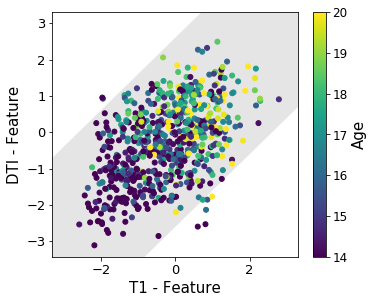

In [7]:
age_clip = age.copy()
age_clip[age>20]=20
age_clip[age<14]=14
idx = np.random.permutation(N*2)

tau1_baseline = tau1[baseline==1]
tau2_baseline = tau2[baseline==1]
band_range = np.std(np.abs(tau1_baseline-tau2_baseline))

plt.figure(figsize=(5.5,4.5))
plt.scatter(tau1_baseline,tau2_baseline,c=age_clip[baseline==1],s=25, zorder=2)
plt.plot([-3,3],[-3,3],linewidth = band_range * 220, color='gray', zorder=1, alpha=.2)
plt.xlabel('T1 - Feature',fontsize=15)
plt.ylabel('DTI - Feature',fontsize=15)
plt.tick_params('both', labelsize='13')
cb = plt.colorbar()
cb.set_label(label='Age', fontsize=15)
cb.ax.tick_params(labelsize='large')

st.pearsonr(tau1[baseline==1],tau2[baseline==1])

(0.4446696029995351, 2.806751004565518e-34)

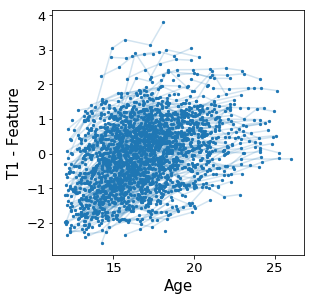

In [8]:
plt.figure(figsize=(4.5,4.5))
for i in range(np.int64(np.max(group))):
    idx = (group==i+1);
    plt.plot(age[idx],tau1[idx],color='tab:blue',alpha=0.2,zorder=1)
    
plt.scatter(age,tau1,s=5,zorder=2)

plt.xlabel('Age',fontsize=15)
plt.ylabel('T1 - Feature',fontsize=15)
plt.tick_params('both', labelsize='13')

st.pearsonr(tau1[baseline==1],age[baseline==1])

(0.4354834859692694, 8.536100221813035e-33)

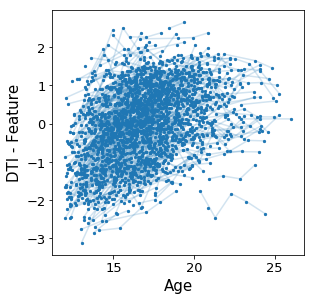

In [9]:
plt.figure(figsize=(4.5,4.5))

for i in range(np.int64(np.max(group))):
    idx = (group==i+1);
    plt.plot(age[idx],tau2[idx],color='tab:blue',alpha=0.2,zorder=1)
plt.scatter(age,tau2,s=5,zorder=2)

plt.xlabel('Age',fontsize=15)
plt.ylabel('DTI - Feature',fontsize=15)
plt.tick_params('both', labelsize='13')

st.pearsonr(tau2[baseline==1],age[baseline==1])